<a href="https://colab.research.google.com/github/malay-pal/MRI/blob/main/neuro_mri_with_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install nibabel

**Library load**

In [ ]:
from google.colab import drive
import os
import nibabel as nib
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


 
**gdrive access. Need to be present in the directory where the data is present**



In [ ]:

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/neuro_mri

#!wget https://fcp-indi.s3.amazonaws.com/data/Projects/RocklandSample/NFBS_Dataset.tar.gz
#!tar -xvzf NFBS_Dataset.tar.gz

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/neuro_mri


**Generate the image data from nii data**

In [ ]:
'''  THIS IS REQUIRED ONLY ONCE FOR GERAING THE IMAGE DATA
import imageio
### converting the nii data to images 
dir = next(os.walk('./NFBS_Dataset'))[1]

### train data
k=0
for folder_name in dir[0:20]:
  act_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*T1w.nii.gz'))
  mask_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brainmask.nii.gz'))
  brain_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brain.nii.gz'))
  act_img = nib.load(act_img_path[0])
  mask_img = nib.load(mask_path[0]) 
  brain_img = nib.load(brain_img_path[0])

  act_img_data = act_img.get_fdata()
  mask_img_data = mask_img.get_fdata()
  brain_img_data = brain_img.get_fdata()

  for i in range(192): #z is the sequence of images
    slices1 = act_img_data[:, :, i] 
    name1 = str(k)+'.png'
    slices2 = mask_img_data[:,:,i]
    name2 = str(k)+'.png'
    cv2.imwrite(os.path.join('dataset','train','images','img',name1),slices1,[int(cv2.IMWRITE_JPEG_QUALITY), 90])
    imageio.imwrite(os.path.join('dataset','train','masks','msk',name2),slices2)
    k=k+1

## val data
k=0
for folder_name in dir[21:22]:
  act_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*T1w.nii.gz'))
  mask_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brainmask.nii.gz'))
  brain_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brain.nii.gz'))
  act_img = nib.load(act_img_path[0])
  mask_img = nib.load(mask_path[0]) 
  brain_img = nib.load(brain_img_path[0])

  act_img_data = act_img.get_fdata()
  mask_img_data = mask_img.get_fdata()
  brain_img_data = brain_img.get_fdata()

  for i in range(192): #z is the sequence of images
    slices1 = act_img_data[:, :, i] 
    name1 = str(k)+'.png'
    slices2 = mask_img_data[:,:,i]
    name2 = str(k)+'.png'
    cv2.imwrite(os.path.join('dataset','val','images','img',name1),slices1,[int(cv2.IMWRITE_JPEG_QUALITY), 90])
    imageio.imwrite(os.path.join('dataset','val','masks','msk',name2),slices2)
    k=k+1


## test data
k=0
for folder_name in dir[23:24]:
  act_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*T1w.nii.gz'))
  mask_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brainmask.nii.gz'))
  #brain_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brain.nii.gz'))
  act_img = nib.load(act_img_path[0])
  mask_img = nib.load(mask_path[0]) 
  #brain_img = nib.load(brain_img_path[0])

  act_img_data = act_img.get_fdata()
  mask_img_data = mask_img.get_fdata()
  brain_img_data = brain_img.get_fdata()

  for i in range(192): #z is the sequence of images
    slices1 = act_img_data[:, :, i] 
    name1 = str(k)+'.png'
    slices2 = mask_img_data[:,:,i]
    name2 = str(k)+'.png'
    cv2.imwrite(os.path.join('dataset','test','images','img',name1),slices1,[int(cv2.IMWRITE_JPEG_QUALITY), 90])
    imageio.imwrite(os.path.join('dataset','test','masks','msk',name2),slices2)
    k=k+1

'''

"  THIS IS REQUIRED ONLY ONCE FOR GERAING THE IMAGE DATA\nimport imageio\n### converting the nii data to images \ndir = next(os.walk('./NFBS_Dataset'))[1]\n\n### train data\nk=0\nfor folder_name in dir[0:20]:\n  act_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*T1w.nii.gz'))\n  mask_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brainmask.nii.gz'))\n  brain_img_path = glob(os.path.join('NFBS_Dataset',folder_name,'*brain.nii.gz'))\n  act_img = nib.load(act_img_path[0])\n  mask_img = nib.load(mask_path[0]) \n  brain_img = nib.load(brain_img_path[0])\n\n  act_img_data = act_img.get_fdata()\n  mask_img_data = mask_img.get_fdata()\n  brain_img_data = brain_img.get_fdata()\n\n  for i in range(192): #z is the sequence of images\n    slices1 = act_img_data[:, :, i] \n    name1 = str(k)+'.png'\n    slices2 = mask_img_data[:,:,i]\n    name2 = str(k)+'.png'\n    cv2.imwrite(os.path.join('dataset','train','images','img',name1),slices1,[int(cv2.IMWRITE_JPEG_QUALITY), 90])\n    im

**Generate train data**

In [ ]:

image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_generator = image_datagen.flow_from_directory(
    './dataset/train/images/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='rgb')

mask_generator = mask_datagen.flow_from_directory(
    './dataset/train/masks/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='grayscale')
# combine generators into one which yields image and masks



Found 3840 images belonging to 1 classes.
Found 3840 images belonging to 1 classes.


**checking train data**


In [ ]:

im = next(image_generator)
mk = next(mask_generator)
print(im.dtype,im.shape,mk.dtype,mk.shape)

ds1 = tf.data.Dataset.from_generator(lambda: image_generator, output_types=(tf.float32),output_shapes=([8,256,256,3]))
ds2 = tf.data.Dataset.from_generator(lambda: mask_generator, output_types=(tf.float32),output_shapes=([8,256,256,1]))

ds_train = tf.data.Dataset.zip((ds1,ds2))

float32 (8, 256, 256, 3) float32 (8, 256, 256, 1)


(8, 256, 256, 3) <dtype: 'float32'> (8, 256, 256, 1) <dtype: 'float32'>


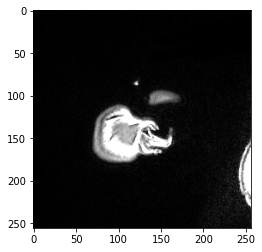

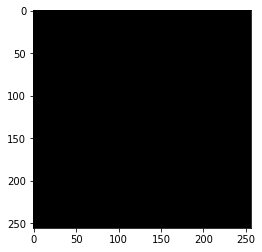

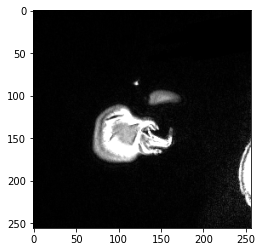

In [ ]:
for im, mk in ds_train:
  print(im.shape,im.dtype, mk.shape,mk.dtype)
  plt.imshow(im[7])
  plt.show()
  plt.imshow(np.squeeze(mk[7]),cmap='gray')
  plt.show()

  imm1= np.squeeze(np.mean(im[7],axis=-1))
  imm2 = imm1-np.squeeze(mk[7])
  plt.imshow(imm2,cmap='gray')
  break




**Generating validation data data**

In [ ]:
image_datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
mask_datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_generator_val = image_datagen_val.flow_from_directory(
    './dataset/val/images/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='rgb')

mask_generator_val = mask_datagen_val.flow_from_directory(
    './dataset/val/masks/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='grayscale')
# combine generators into one which yields image and masks
ds1_val = tf.data.Dataset.from_generator(lambda: image_generator_val, output_types=(tf.float32),output_shapes=([8,256,256,3]))
ds2_val = tf.data.Dataset.from_generator(lambda: mask_generator_val, output_types=(tf.float32),output_shapes=([8,256,256,1]))

ds_val = tf.data.Dataset.zip((ds1_val,ds2_val))

for im, mk in ds_val:
  print(im.shape,im.dtype, mk.shape,mk.dtype)
  break

Found 192 images belonging to 1 classes.
Found 192 images belonging to 1 classes.
(8, 256, 256, 3) <dtype: 'float32'> (8, 256, 256, 1) <dtype: 'float32'>


**Generating model UNET**

In [ ]:

def conv_block(x, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def build_model():
    size = 256
    num_filters = [16, 32, 48, 64]
    inputs = Input((size, size, 3))

    skip_x = []
    x = inputs
    ## Encoder
    for f in num_filters:
        x = conv_block(x, f)
        skip_x.append(x)
        x = MaxPool2D((2, 2))(x)

    ## Bridge
    x = conv_block(x, num_filters[-1])

    num_filters.reverse()
    skip_x.reverse()
    ## Decoder
    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2))(x)
        xs = skip_x[i]
        x = Concatenate()([x, xs])
        x = conv_block(x, f)

    ## Output
    x = Conv2D(1, (1, 1), padding="same")(x)
    x = Activation("sigmoid")(x)

    return Model(inputs, x)



model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

**Trainning the model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

## Hyperparameters
batch = 8
lr = 1e-4
epochs = 20


opt = tf.keras.optimizers.Adam(lr)
metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), iou]
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)

callbacks = [
        ModelCheckpoint("saved_models/model.h5"),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
        CSVLogger("saved_models/data.csv"),
        TensorBoard(),
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
    ]

train_len = 3840
val_len = 192
train_steps = train_len//batch
valid_steps = val_len//batch

if train_len % batch != 0:
  train_steps += 1
if val_len % batch != 0:
  valid_steps += 1

history = model.fit(ds_train,
        validation_data=ds_val,
        epochs=epochs,
        steps_per_epoch=train_steps,
        validation_steps=valid_steps,
        callbacks=callbacks)


tf.keras.models.save_model(model,'saved_models/model.h5')


Epoch 1/20
480/480 [==============================] - 3694s 8s/step - loss: 0.3868 - acc: 0.9271 - recall: 0.9159 - precision: 0.6483 - iou: 0.2256 - val_loss: 0.2303 - val_acc: 0.9916 - val_recall: 0.9456 - val_precision: 0.9729 - val_iou: 0.3079
Epoch 2/20
480/480 [==============================] - 120s 249ms/step - loss: 0.2123 - acc: 0.9948 - recall: 0.9802 - precision: 0.9671 - iou: 0.3282 - val_loss: 0.1502 - val_acc: 0.9941 - val_recall: 0.9872 - val_precision: 0.9578 - val_iou: 0.4206
Epoch 3/20
480/480 [==============================] - 119s 248ms/step - loss: 0.1494 - acc: 0.9957 - recall: 0.9838 - precision: 0.9733 - iou: 0.4056 - val_loss: 0.1130 - val_acc: 0.9951 - val_recall: 0.9807 - val_precision: 0.9741 - val_iou: 0.4951
Epoch 4/20
480/480 [==============================] - 118s 247ms/step - loss: 0.1071 - acc: 0.9956 - recall: 0.9809 - precision: 0.9741 - iou: 0.4789 - val_loss: 0.0848 - val_acc: 0.9955 - val_recall: 0.9746 - val_precision: 0.9823 - val_iou: 0.5503
Ep

**Checking the model**

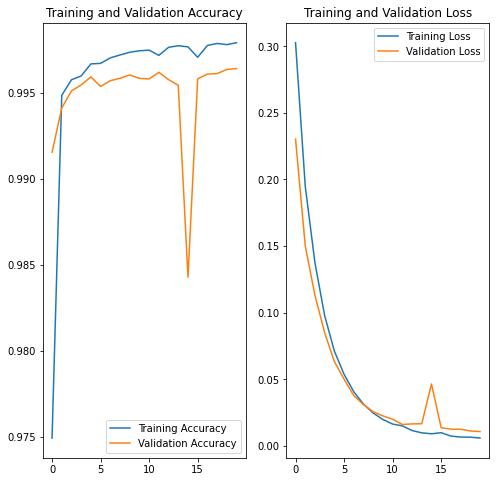

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Generating test data**

In [ ]:
image_datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
mask_datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_generator_test = image_datagen_test.flow_from_directory(
    './dataset/test/images/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='rgb')

mask_generator_test = mask_datagen_test.flow_from_directory(
    './dataset/test/masks/',
    class_mode=None,
    seed=seed,
    batch_size=8,
    color_mode='grayscale')
# combine generators into one which yields image and masks
ds1_test = tf.data.Dataset.from_generator(lambda: image_generator_test, output_types=(tf.float32),output_shapes=([8,256,256,3]))
ds2_test = tf.data.Dataset.from_generator(lambda: mask_generator_test, output_types=(tf.float32),output_shapes=([8,256,256,1]))

ds_test = tf.data.Dataset.zip((ds1_test,ds2_test))

for im, mk in ds_test:
  print(im.shape,im.dtype, mk.shape,mk.dtype)
  break

Found 192 images belonging to 1 classes.
Found 192 images belonging to 1 classes.
(8, 256, 256, 3) <dtype: 'float32'> (8, 256, 256, 1) <dtype: 'float32'>


**Evaluation**

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import CustomObjectScope

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)
    

## Hyperparameters
lr = 1e-4
epochs = 20
test_len =192
batch_size = 8

test_steps = test_len/batch_size
if test_len % batch_size != 0:
  test_steps += 1

with CustomObjectScope({'iou': iou}):
    model = tf.keras.models.load_model('saved_models/model.h5')

opt = tf.keras.optimizers.Adam(lr)
metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), iou]
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics) #complie the model before loading the weights
results = model.evaluate(ds_test, steps=test_steps)

24/24 [==============================] - 251s 10s/step - loss: 0.0101 - acc: 0.9964 - recall_1: 0.9890 - precision_1: 0.9784 - iou: 0.9450


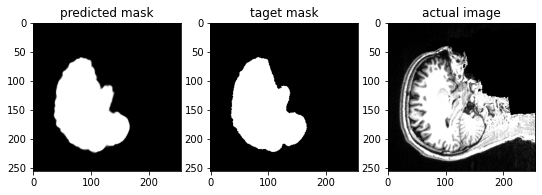

In [ ]:
for x, y in ds_test:
  im = x[0]
  mk = y[0] 
  y_pred = model.predict(x)
  break

plt.figure(figsize=(9, 9))
plt.subplot(1,3,1)
plt.imshow(np.squeeze(y_pred[0]*255,axis=-1),cmap='gray')
plt.title('predicted mask')

im = im
plt.subplot(1,3,3)
plt.imshow(im)
plt.title('actual image')

plt.subplot(1,3,2)
mk =np.squeeze(mk,axis=-1)
mk = mk*255
plt.imshow(mk,cmap='gray')
plt.title('taget mask')

'''
im1 = np.mean(im,axis=-1)
im2 = im1*255 - mk
plt.imshow(im2,cmap='gray')
'''
plt.show()

**predicting the custom data and saving in nii format**

In [ ]:
act_img_path = glob(os.path.join('dataset','BSA','sub-01','*.nii.gz'))
img  = nib.load(act_img_path[0])
img_data = img.get_fdata()
mask_affine = img.affine
header = img.header
nb_img = header.get_data_shape()
nb_img_h = nb_img[0]
mask_data = img_data

for sl in range(nb_img_h):
  slice_h = img_data[sl,:,:]/255
  #print(slice_h.shape)
  slice_h = np.flip(slice_h)
  #plt.imshow(slice_h)
  #plt.show()
  slice_h = cv2.merge((slice_h,slice_h,slice_h))
  slice_h_batch = np.array([slice_h])
  #print(slice_h_batch.shape)
  pred_sl = model.predict(slice_h_batch)
  final_sl = np.squeeze(pred_sl[0]*255,axis=-1)
  mask_data[sl,:,:] = np.flip(final_sl)

'''
  plt.figure(figsize=(9, 9))
  plt.subplot(1,3,2)
  plt.title('act image')
  plt.imshow(np.squeeze(np.mean(slice_h,axis=-1))*255,cmap='gray')
  plt.subplot(1,3,1)
  plt.title('Pred mask')
  plt.imshow(np.squeeze(pred_sl[0]*255,axis=-1),cmap='gray')
  plt.subplot(1,3,3)
  plt.title('confimation')
  plt.imshow((np.squeeze(np.mean(slice_h,axis=-1))*255+np.squeeze(pred_sl[0]*255,axis=-1)),cmap='gray')
  plt.plot()
  break

'''

mask_nib = nib.Nifti1Image(mask_data, affine=mask_affine, header=header)
nib.save(mask_nib,os.path.join('dataset','BSA','sub-01','mask.nii.gz'))

**Checking the results**

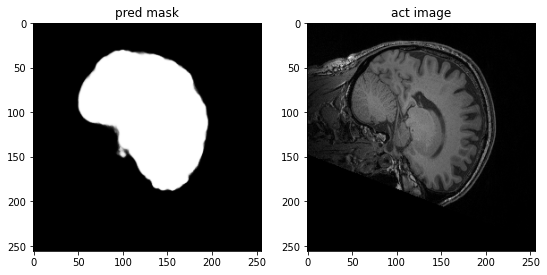

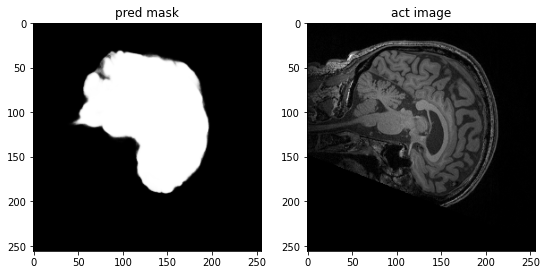

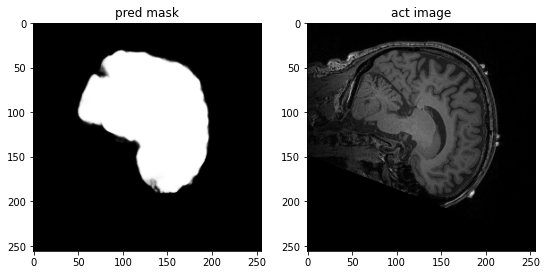

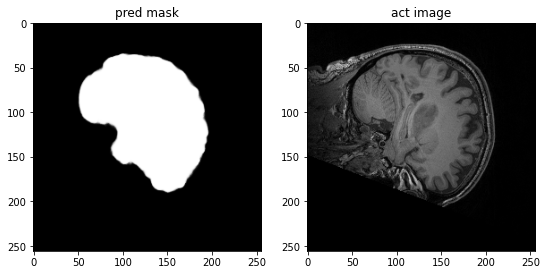

In [ ]:
path = glob(os.path.join('dataset','BSA','sub-01','*.nii.gz'))
img  = nib.load(path[0])
mask  = nib.load(path[1])
img_data = img.get_fdata()
mask_data = mask.get_fdata()

lim = [60,75,90,105]
for sl in lim:
  slice_h = img_data[sl,:,:]
  slice_h_m = mask_data[sl,:,:]
  plt.figure(figsize=(9, 9))
  plt.subplot(1,2,2)
  plt.title('act image')
  plt.imshow(np.squeeze(slice_h),cmap='gray')
  plt.subplot(1,2,1)
  plt.title('pred mask')
  plt.imshow(np.squeeze(slice_h_m),cmap='gray')
  plt.plot()
